# 1. XOR

In [1]:
import numpy as np 
from tensorflow.keras.models import Sequential  # 모델 객체 생성시
from tensorflow.keras.layers import Dense  #layer 쌓을 때 필요한 함수
import matplotlib.pyplot as plt


In [8]:
# 1.data set
x_data = [[0,0], [0,1], [1,0], [1,1]]
y_data = [[0],   [1],   [1],   [0]]

# 2.모델 구성
model = Sequential() #순차적인  #`Sequential` groups a linear stack of layers into a `tf.keras.Model`.
model.add(Dense(10,input_dim=2,activation="relu")) #Dense로 층을 쌓아가 
model.add(Dense(20,activation="relu"))         # 은닉층은 input_dim쓰지 않음  
model.add(Dense(10, activation="relu")) #   200+10= 210개 ?????????????????????????  #parameter == 변수
model.add(Dense(1,activation="sigmoid"))     #10+bias1개 = 11개
model.add(Dense())

#바로 전층의 출력개수가 여기에 입력 갯수
# Dense layer is the regular deeply connected neural network layer.
# Dense layer does the below operation on the input and return the output.

# 입력 2개, 출력10: Weight 20 (10행2열), bias 10개
print(model.summary())  # 파라미터의 갯수  


# 3.모델 학습과정 
model.compile(loss="mse", optimizer="adam",metrics=['binary_accuracy'])
#model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
#model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])

#loss가 줄어든거같은데, 다시 올라가 tensorflow2는 loss늘었다 줄었다 더 늘었다  볼 수 있음

# 4,학습하기 
fit_hist = model.fit(x_data, y_data,epochs=100)       #verbose=1 기본값. verbose=0아무것도 안보여줌







Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_9 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/1 [==============================] - 0s 374ms/step - loss: 0.2677 - binary_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2667 - binary_accuracy: 0.2500
Epoch 3/100
1/1 [======================

1/1 [==============================] - 0s 5ms/step - loss: 0.2055 - binary_accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2045 - binary_accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2034 - binary_accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2024 - binary_accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2013 - binary_accuracy: 1.0000
Epoch 75/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2003 - binary_accuracy: 1.0000
Epoch 76/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1993 - binary_accuracy: 1.0000
Epoch 77/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1983 - binary_accuracy: 1.0000
Epoch 78/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1972 - binary_accuracy: 1.0000
Epoch 79/100
1/1 [==============================] - 0s 4ms/step - lo

In [9]:
fit_hist.history.keys()       #dictionary type

dict_keys(['loss', 'binary_accuracy'])

In [10]:
for acc in fit_hist.history['binary_accuracy']:
    print(acc,end="\t")      #accuracy 점점점 좋아 진다 

0.5	0.25	0.25	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.5	0.75	0.75	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	

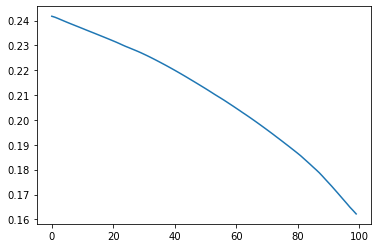

In [6]:
plt.plot(fit_hist.history['loss'])
plt.show()

In [3]:
# 입력 스타일은  0 0 
while True:
    input_list = input("space로 분리해서 0 이나 1을 2개 입력 (종료:9)").strip().split()
    input_data = list(map(int, input_list))   #map함수
    if input_data[0] == 9:
        break;
    input_data = np.array(input_data).reshape(1,2)
    print("입력값:",input_data)
    print("예측값:", int( model.predict(input_data).round() )  )   # 예측값이 0 아니면 1로 나와야기때문에 round()

space로 분리해서 0 이나 1을 2개 입력 (종료:9)0 1
입력값: [[0 1]]
예측값: 1
space로 분리해서 0 이나 1을 2개 입력 (종료:9)9


In [ ]:
model.predict([ [0],[1] ] )

# 2. OR
- 교안 p76 참조

In [18]:
# 1.data set
x_or_data = np.array([[0,0], [0,1], [1,0], [1,1]],  'float32')  #4행2열
y_or_data = np.array([[0],   [1],   [1],   [1]], 'float32' )    #4행1열

# 2.모델 구성
model = Sequential() #순차적인  #`Sequential` groups a linear stack of layers into a `tf.keras.Model`.
model.add(Dense(32,input_dim=2,activation="relu")) # Dense로 층을 쌓아가  # 입력2개 출력10개  #32개로 늘려서 
model.add(Dense(16,activation="relu"))         # 은닉층은 input_dim쓰지 않음  
model.add(Dense(1,activation="sigmoid"))   

#입력 2개.    32x2 +32개 bias 

#32행 2열 

print(model.summary())  # 파라미터의 갯수  

#끝에 완만하게 안되는것 epochs를 늘려야겠다 

# 3.모델 학습과정 
model.compile(loss="mse", optimizer="adam",metrics=['binary_accuracy'])
#model.compile(loss="crossentropy", optimizer="adam",metrics=['accuracy'])
#model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])

# 4,학습하기 
fit_hist = model.fit(x_or_data, y_or_data,epochs=300)       #verbose=1 기본값. verbose=0아무것도 안보여줌


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_23 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
1/1 [==============================] - 0s 457ms/step - loss: 0.2341 - binary_accuracy: 1.0000
Epoch 2/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2316 - binary_accuracy: 0.7500
Epoch 3/300
1/1 [==============================] - 0s 3ms/step - loss: 0.2291 - binary_accuracy: 0.7500
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 0.1118 - binary_accuracy: 0.7500
Epoch 72/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1109 - binary_accuracy: 0.7500
Epoch 73/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1100 - binary_accuracy: 0.7500
Epoch 74/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1091 - binary_accuracy: 0.7500
Epoch 75/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1083 - binary_accuracy: 0.7500
Epoch 76/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1074 - binary_accuracy: 0.7500
Epoch 77/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1065 - binary_accuracy: 0.7500
Epoch 78/300
1/1 [==============================] - 0s 5ms/step - loss: 0.1057 - binary_accuracy: 0.7500
Epoch 79/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1048 - binary_accuracy: 0.7500
Epoch 80/300
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 3ms/step - loss: 0.0616 - binary_accuracy: 1.0000
Epoch 149/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0611 - binary_accuracy: 1.0000
Epoch 150/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0606 - binary_accuracy: 1.0000
Epoch 151/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0601 - binary_accuracy: 1.0000
Epoch 152/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0595 - binary_accuracy: 1.0000
Epoch 153/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0590 - binary_accuracy: 1.0000
Epoch 154/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0585 - binary_accuracy: 1.0000
Epoch 155/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0580 - binary_accuracy: 1.0000
Epoch 156/300
1/1 [==============================] - 0s 4ms/step - loss: 0.0575 - binary_accuracy: 1.0000
Epoch 157/300
1/1 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 3ms/step - loss: 0.0292 - binary_accuracy: 1.0000
Epoch 226/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0288 - binary_accuracy: 1.0000
Epoch 227/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0285 - binary_accuracy: 1.0000
Epoch 228/300
1/1 [==============================] - 0s 2ms/step - loss: 0.0282 - binary_accuracy: 1.0000
Epoch 229/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0279 - binary_accuracy: 1.0000
Epoch 230/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0276 - binary_accuracy: 1.0000
Epoch 231/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0273 - binary_accuracy: 1.0000
Epoch 232/300
1/1 [==============================] - 0s 3ms/step - loss: 0.0270 - binary_accuracy: 1.0000
Epoch 233/300
1/1 [==============================] - 0s 5ms/step - loss: 0.0267 - binary_accuracy: 1.0000
Epoch 234/300
1/1 [==============================] - 0s 2ms/

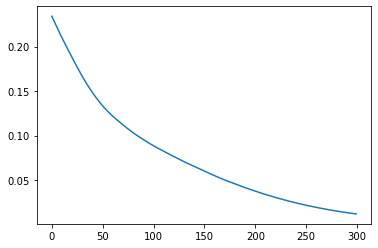

In [20]:
plt.plot(fit_hist.history['loss'])
plt.show()

# 3. AND

In [26]:
# 1.data set
x_or_data = np.array([[0,0], [0,1], [1,0], [1,1]],  'float32')  #4행2열
y_or_data = np.array([[0],   [0],   [0],   [1]], 'float32' )    #4행1열

# 2.모델 구성
model = Sequential() #순차적인  #`Sequential` groups a linear stack of layers into a `tf.keras.Model`.
model.add(Dense(32,input_dim=2,activation="relu")) # Dense로 층을 쌓아가  # 입력2개 출력10개  #32개로 늘려서 
model.add(Dense(16,activation="relu"))         # 은닉층은 input_dim쓰지 않음  
model.add(Dense(1,activation="sigmoid"))   

#입력 2개.    32x2 +32개 bias  = 96   (1st layer) **************************************************************************
#             16x32+16 = 528
#              16x1+1 = 17

print(model.summary())  # 파라미터의 갯수     를 알아두는 이유 : 속도를 보기 위해 

#끝에 완만하게 안되는것 epochs를 늘려야겠다 

# 3.모델 학습과정 
model.compile(loss="mse", optimizer="adam",metrics=['binary_accuracy'])
#model.compile(loss="crossentropy", optimizer="adam",metrics=['accuracy'])
#model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])

# 4,학습하기 
fit_hist = model.fit(x_or_data, y_or_data,epochs=500)       #verbose=1 기본값. verbose=0아무것도 안보여줌


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_32 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
1/1 [==============================] - 0s 335ms/step - loss: 0.2522 - binary_accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2500 - binary_accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2478 - binary_accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 0.1257 - binary_accuracy: 1.0000
Epoch 72/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1238 - binary_accuracy: 1.0000
Epoch 73/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1219 - binary_accuracy: 1.0000
Epoch 74/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1200 - binary_accuracy: 1.0000
Epoch 75/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1181 - binary_accuracy: 1.0000
Epoch 76/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1163 - binary_accuracy: 1.0000
Epoch 77/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1144 - binary_accuracy: 1.0000
Epoch 78/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1125 - binary_accuracy: 1.0000
Epoch 79/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1107 - binary_accuracy: 1.0000
Epoch 80/500
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 3ms/step - loss: 0.0272 - binary_accuracy: 1.0000
Epoch 149/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0267 - binary_accuracy: 1.0000
Epoch 150/500
1/1 [==============================] - ETA: 0s - loss: 0.0261 - binary_accuracy: 1.000 - 0s 3ms/step - loss: 0.0261 - binary_accuracy: 1.0000
Epoch 151/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0256 - binary_accuracy: 1.0000
Epoch 152/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0251 - binary_accuracy: 1.0000
Epoch 153/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0245 - binary_accuracy: 1.0000
Epoch 154/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0240 - binary_accuracy: 1.0000
Epoch 155/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0235 - binary_accuracy: 1.0000
Epoch 156/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0231 - binary_accuracy: 1.0000
Epoch 157/

1/1 [==============================] - 0s 3ms/step - loss: 0.0066 - binary_accuracy: 1.0000
Epoch 225/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0065 - binary_accuracy: 1.0000
Epoch 226/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0064 - binary_accuracy: 1.0000
Epoch 227/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0063 - binary_accuracy: 1.0000
Epoch 228/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0062 - binary_accuracy: 1.0000
Epoch 229/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0061 - binary_accuracy: 1.0000
Epoch 230/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0060 - binary_accuracy: 1.0000
Epoch 231/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 232/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 233/500
1/1 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 301/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 302/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0027 - binary_accuracy: 1.0000
Epoch 303/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 304/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 305/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 306/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0026 - binary_accuracy: 1.0000
Epoch 307/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 308/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 309/500
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 2ms/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 378/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 379/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0015 - binary_accuracy: 1.0000
Epoch 380/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 381/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 382/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 383/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 384/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 385/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0014 - binary_accuracy: 1.0000
Epoch 386/500
1/1 [==============================] - 0s 3ms/

Epoch 454/500
1/1 [==============================] - 0s 2ms/step - loss: 9.3361e-04 - binary_accuracy: 1.0000
Epoch 455/500
1/1 [==============================] - 0s 2ms/step - loss: 9.2858e-04 - binary_accuracy: 1.0000
Epoch 456/500
1/1 [==============================] - 0s 3ms/step - loss: 9.2368e-04 - binary_accuracy: 1.0000
Epoch 457/500
1/1 [==============================] - 0s 3ms/step - loss: 9.1876e-04 - binary_accuracy: 1.0000
Epoch 458/500
1/1 [==============================] - 0s 3ms/step - loss: 9.1395e-04 - binary_accuracy: 1.0000
Epoch 459/500
1/1 [==============================] - 0s 2ms/step - loss: 9.0921e-04 - binary_accuracy: 1.0000
Epoch 460/500
1/1 [==============================] - 0s 2ms/step - loss: 9.0459e-04 - binary_accuracy: 1.0000
Epoch 461/500
1/1 [==============================] - 0s 3ms/step - loss: 8.9981e-04 - binary_accuracy: 1.0000
Epoch 462/500
1/1 [==============================] - 0s 3ms/step - loss: 8.9512e-04 - binary_accuracy: 1.0000
Epoch 463/

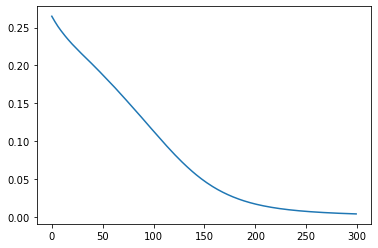

In [25]:
plt.plot(fit_hist.history['loss'])